In [1]:
import numpy as np 
import pandas as pd 
import plotly.graph_objs as go #visualization 
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline 
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True) 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer = pd.read_csv('Customer-Churn.csv', sep=',') 
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer.shape

(7043, 21)

In [4]:
#is any row NULL ?

customer.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [5]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#labels
lab = customer["Churn"].value_counts().keys().tolist()
#values
val = customer["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'pink' ,'black'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition rate in Y-Mobile",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)


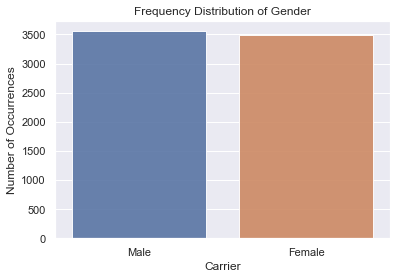

In [7]:
#Gender distribution in the data 
gender_count = customer["gender"].value_counts()
sns.set(style="darkgrid")
sns.barplot(gender_count.index, gender_count.values, alpha=0.9)
plt.title('Frequency Distribution of Gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

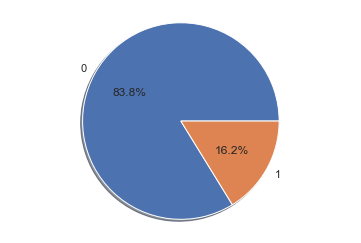

In [8]:
#distribution of senior citizen - 0 denotes young citizen and 1 denotes senior citizen 
labels = customer['SeniorCitizen'].astype('category').cat.categories.tolist()
counts = customer['SeniorCitizen'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

Text(0.5, 1.0, 'Number of Customers by their tenure')

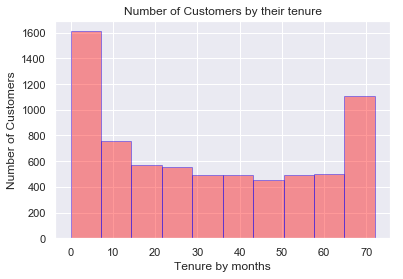

In [9]:
ax = sns.distplot(customer['tenure'], hist=True, kde=False, 
             bins=int(50/5), color = 'red', 
             hist_kws={'edgecolor':'blue'}) 
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure by months')
ax.set_title('Number of Customers by their tenure')

Text(0.5, 1.0, 'Number of Customers by Contract Type')

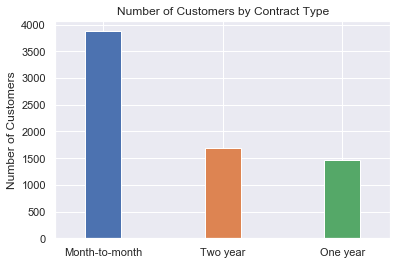

In [10]:
ax = customer['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

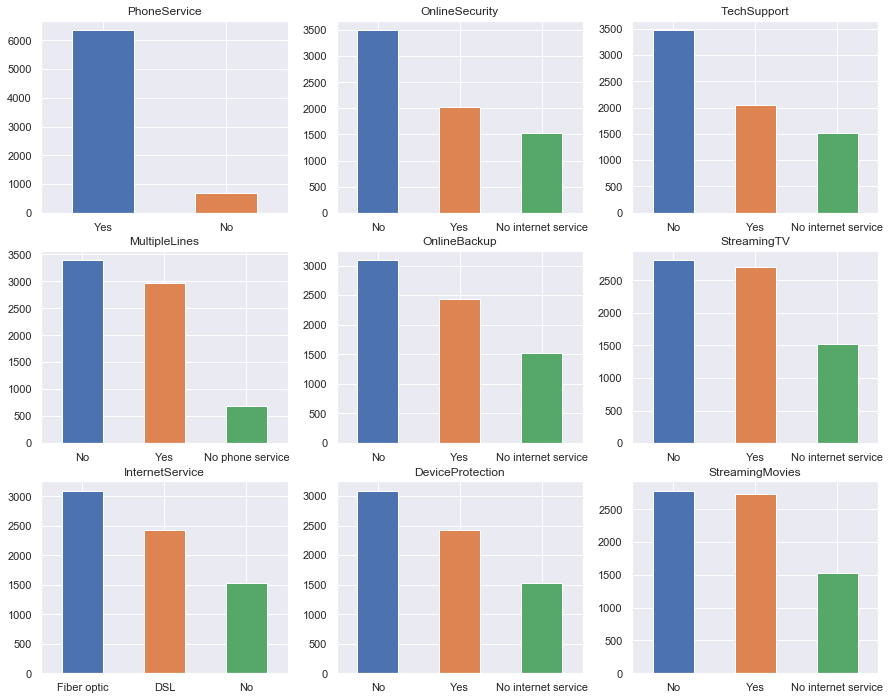

In [11]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = customer[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = customer[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = customer[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

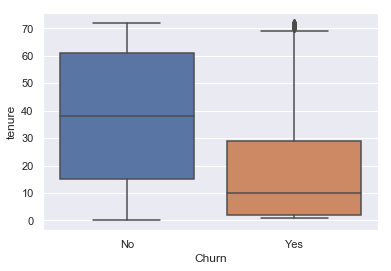

In [12]:
#attrition rate with tenure 
sns.boxplot(x = customer.Churn, y = customer.tenure)

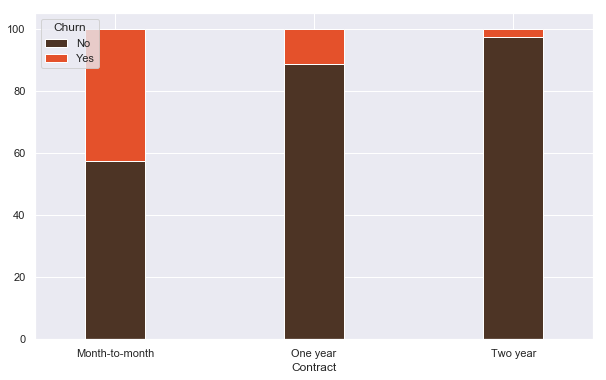

In [13]:
#attrition rate by contract
colors = ['#4D3425','#E4512B']
contract_churn = customer.groupby(['Contract','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

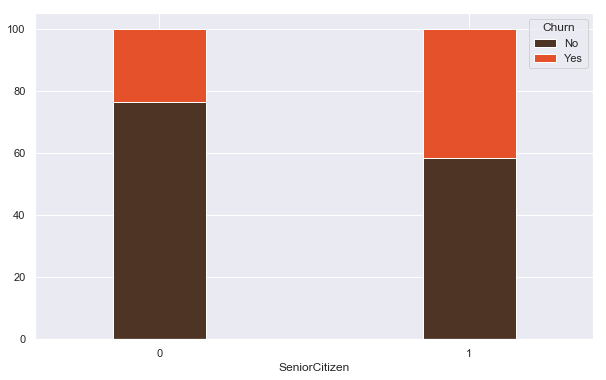

In [14]:
#attrition rate by seniority 0 denotes young citizen and 1 denotes senior citizen 
colors = ['#4D3425','#E4512B']
contract_churn = customer.groupby(['SeniorCitizen','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

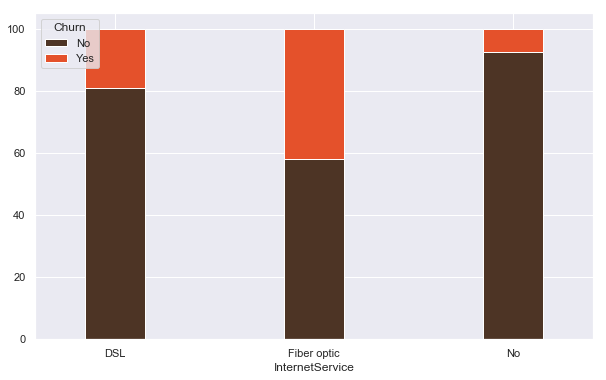

In [15]:
#attrition rate by seniority 0 denotes young citizen and 1 denotes senior citizen 
colors = ['#4D3425','#E4512B']
contract_churn = customer.groupby(['InternetService','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

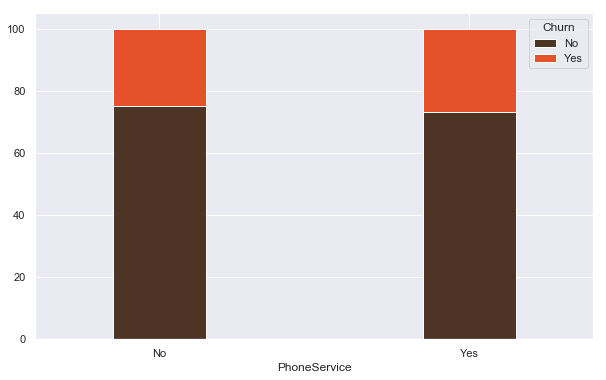

In [16]:
#attrition rate by seniority 0 denotes young citizen and 1 denotes senior citizen 
colors = ['#4D3425','#E4512B']
contract_churn = customer.groupby(['PhoneService','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

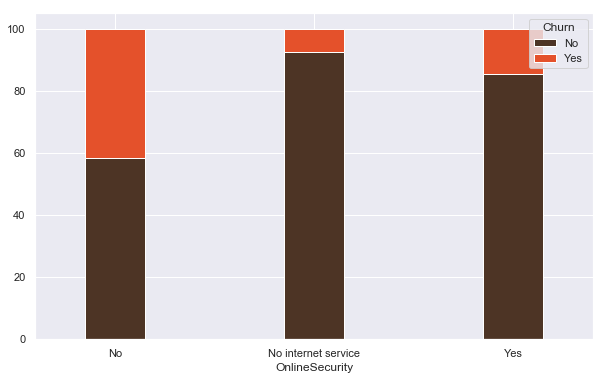

In [17]:
#attrition rate by seniority 0 denotes young citizen and 1 denotes senior citizen 
colors = ['#4D3425','#E4512B']
contract_churn = customer.groupby(['OnlineSecurity','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

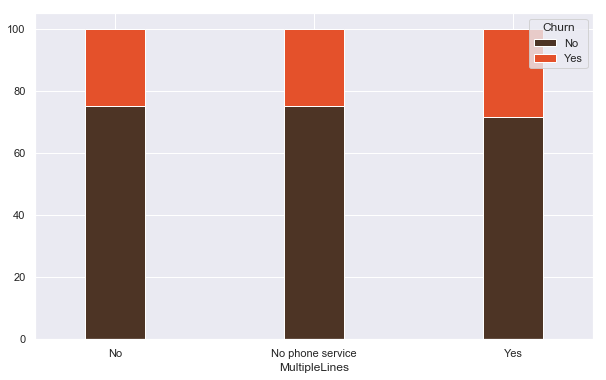

In [18]:
#attrition rate by seniority 0 denotes young citizen and 1 denotes senior citizen 
colors = ['#4D3425','#E4512B']
contract_churn = customer.groupby(['MultipleLines','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

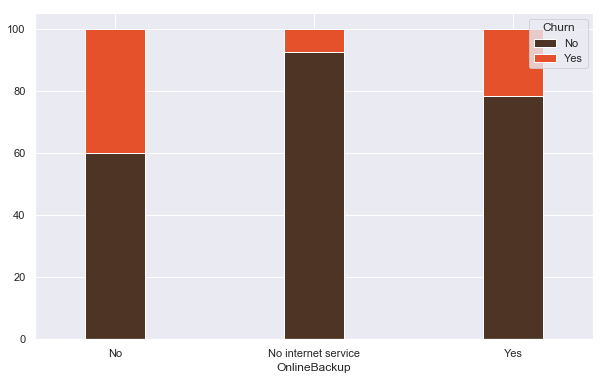

In [19]:
#attrition rate by seniority 0 denotes young citizen and 1 denotes senior citizen 
colors = ['#4D3425','#E4512B']
contract_churn = customer.groupby(['OnlineBackup','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

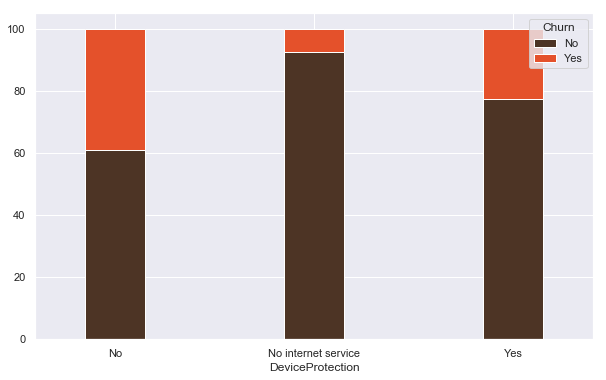

In [20]:
#attrition rate by seniority 0 denotes young citizen and 1 denotes senior citizen 
colors = ['#4D3425','#E4512B']
contract_churn = customer.groupby(['DeviceProtection','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

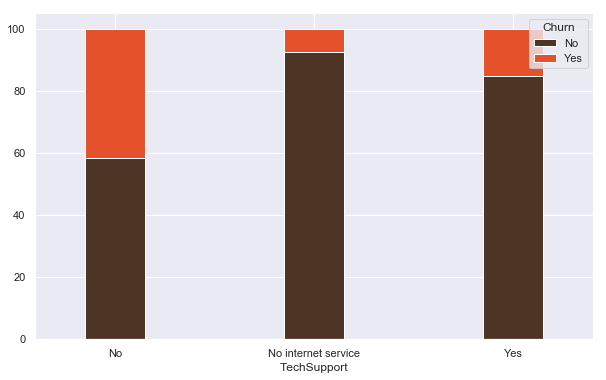

In [21]:
#attrition rate by seniority 0 denotes young citizen and 1 denotes senior citizen 
colors = ['#4D3425','#E4512B']
contract_churn = customer.groupby(['TechSupport','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

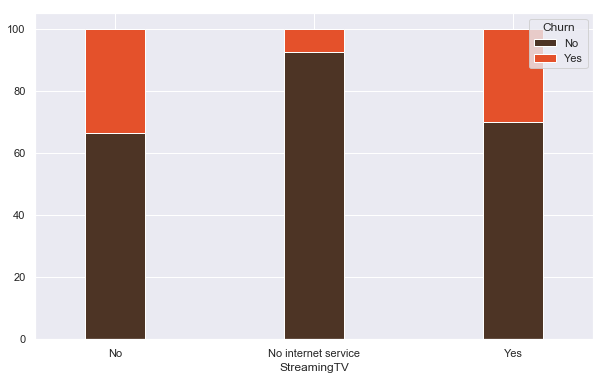

In [22]:
#attrition rate by seniority 0 denotes young citizen and 1 denotes senior citizen 
colors = ['#4D3425','#E4512B']
contract_churn = customer.groupby(['StreamingTV','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

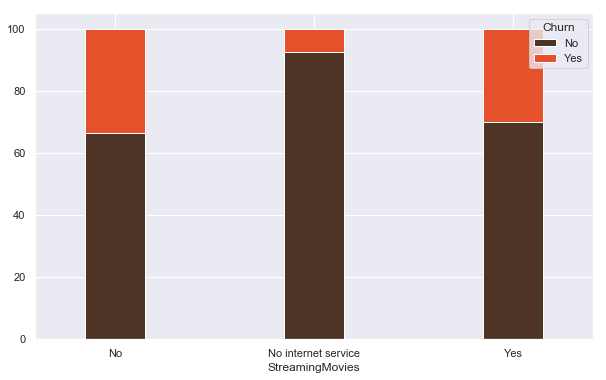

In [23]:
#attrition rate by seniority 0 denotes young citizen and 1 denotes senior citizen 
colors = ['#4D3425','#E4512B']
contract_churn = customer.groupby(['StreamingMovies','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

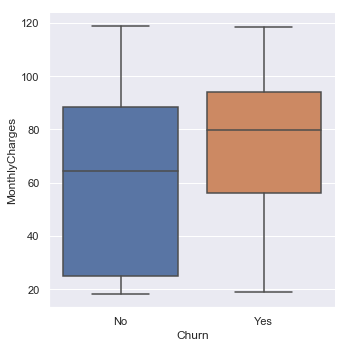

In [24]:
#Higher monthly charges with churn rate
sns.catplot(x="Churn", y="MonthlyCharges", kind="box", data=customer);

In [25]:
#Replacing spaces with null values in total charges column
customer['TotalCharges'] = customer["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
customer = customer[customer["TotalCharges"].notnull()]
customer = customer.reset_index()[customer.columns]
#Higher monthly charges with churn rate
customer["TotalCharges"] = customer["TotalCharges"].astype(float)
#sns.catplot(x="Churn", y="TotalCharges", kind="box", data=customer);

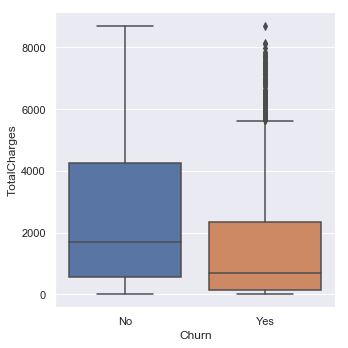

In [26]:
#Higher total charges with churn rate
sns.catplot(x="Churn", y="TotalCharges", kind="box", data=customer);

In [27]:
#Separating churn and non churn customers
churn     = customer[customer["Churn"] == "Yes"]
not_churn = customer[customer["Churn"] == "No"]

In [28]:
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [29]:
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = customer.nunique()[customer.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in customer.columns if x not in cat_cols + target_col + Id_col]
for i in num_cols :
    histogram(i)